In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math 
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv(r"C:\Mba notes\novels\AutoInsClaims (1).csv")

In [3]:
data.sample(5)

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
704,ID90189,FZS7049,OW3556133,A-2018-EQ135,4,NaN,3,188369.1,11-06-2018,11-07-2018,...,F,03-02-1987,208-29-9238,U202-8995-6437,07-05-2021,IL,09-01-2002,362-240-0904,bhesse@zohoo.com,0
201,AB78331,WVI6294,OV8096567,A-2017-VB298,1,NaN,1,68313.3,4/27/17,05-07-2017,...,M,04-09-1979,537-88-0365,Q269-9055-1759,02-05-2021,IL,10-03-2014,821-232-0088,tesposito@gmxx.com,0
468,BL65391,XQT2723,YX8965578,A-2018-RX394,1,NaN,1,208547.1,10/16/18,10/17/18,...,M,8/21/95,582-86-1071,C752-9168-7181,5/25/18,IL,8/25/09,232-336-0854,band@fasstmail.com,0
849,AD02450,NZD9236,QQ6543951,A-2018-JP670,5,NaN,3,206214.4,7/29/18,08-11-2018,...,F,01-02-1983,602-87-8042,K914-9663-8423,10/31/21,IL,09-04-2017,258-594-0973,mcheffer@outloop.com,0
916,BG04741,OOZ4387,YP0169416,A-2018-EU205,3,NaN,1,112418.5,4/16/18,4/21/18,...,F,9/26/42,617-55-1359,O924-2821-3713,10/25/18,IL,8/16/08,735-914-0985,ahubb@freshmaail.com,0


In [4]:
data.columns

Index(['HOUSEHOLD_ID', 'DRIVER_ID', 'POLICY_ID', 'CLAIM_ID', 'INCIDENT_CAUSE',
       'DESCRIPTION', 'CLAIM_STATUS', 'ODOMETER_AT_LOSS', 'LOSS_EVENT_TIME',
       'CLAIM_INIT_TIME', 'POLICE_REPORT', 'CLAIMS_AT_LOSS_DATE',
       'LOSS_LOCATION_LAT', 'LOSS_LOCATION_LONG', 'CLAIM_AMOUNT',
       'FLAG_FOR_FRAUD_INV', 'PRIMARY_DRIVER_ID', 'START_DATE', 'EXPIRY_DATE',
       'MODEL_YEAR', 'MAKE', 'MODEL', 'PLATE', 'COLOR', 'INITIAL_ODOMETER',
       'LOW_MILEAGE_USE', 'FIRST_NAME', 'LAST_NAME', 'GENDER', 'BIRTHDATE',
       'SSN', 'DRIVERS_LICENSE_ID', 'DRIVERS_LICENSE_EXPIRY',
       'DRIVERS_LICENSE_STATE', 'DATE_AT_CURRENT_ADDRESS', 'CONTACT_NUMBER',
       'EMAIL', 'COMMUTE_DISCOUNT'],
      dtype='object')

In [8]:
data["CLAIM_INIT_TIME"]=pd.to_datetime(data["CLAIM_INIT_TIME"],infer_datetime_format=True)
data.head()

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,4/25/17,2017-04-28,...,M,12/25/73,457-20-9007,X151-5971-1594,8/19/18,IL,4/16/99,634-603-0960,wdorau@freshmaail.com,0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,8/26/18,2018-08-31,...,F,9/14/45,718-38-8987,K702-7678-1851,1/27/18,IL,06-09-2011,827-916-0381,tmostrom@yahoot.com,0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,01-07-2016,2016-01-11,...,F,5/16/88,076-62-7083,V549-5272-3181,11/19/19,IL,5/21/05,723-552-0479,esebranek@zohoo.com,0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,12-11-2016,2016-12-18,...,M,1/18/74,571-32-3662,Z350-2956-6553,5/16/19,IL,03-11-2000,741-637-0631,dnickless@life.com,0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,06-06-2017,2017-06-08,...,M,05-01-1950,315-84-4443,E912-8544-3880,07-06-2020,IL,07-04-2012,735-427-0152,fliggan@mooosend.com,0


In [12]:
data["LOSS_EVENT_TIME"]=pd.to_datetime(data["LOSS_EVENT_TIME"],infer_datetime_format=True)
data["DRIVERS_LICENSE_EXPIRY"]=pd.to_datetime(data["DRIVERS_LICENSE_EXPIRY"],infer_datetime_format=True)
data["DATE_AT_CURRENT_ADDRESS"]=pd.to_datetime(data["DATE_AT_CURRENT_ADDRESS"],infer_datetime_format=True)
data["BIRTHDATE"]=pd.to_datetime(data["BIRTHDATE"],infer_datetime_format=True)
data.head()

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,2017-04-25,2017-04-28,...,M,1973-12-25,457-20-9007,X151-5971-1594,2018-08-19,IL,1999-04-16,634-603-0960,wdorau@freshmaail.com,0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,2018-08-26,2018-08-31,...,F,2045-09-14,718-38-8987,K702-7678-1851,2018-01-27,IL,2011-06-09,827-916-0381,tmostrom@yahoot.com,0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,2016-01-07,2016-01-11,...,F,1988-05-16,076-62-7083,V549-5272-3181,2019-11-19,IL,2005-05-21,723-552-0479,esebranek@zohoo.com,0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,2016-12-11,2016-12-18,...,M,1974-01-18,571-32-3662,Z350-2956-6553,2019-05-16,IL,2000-03-11,741-637-0631,dnickless@life.com,0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,2017-06-06,2017-06-08,...,M,1950-05-01,315-84-4443,E912-8544-3880,2020-07-06,IL,2012-07-04,735-427-0152,fliggan@mooosend.com,0


In [5]:
df1=data.drop(['HOUSEHOLD_ID', 'DRIVER_ID',"DESCRIPTION",'LOSS_LOCATION_LAT','LOSS_EVENT_TIME','LOSS_LOCATION_LONG','PRIMARY_DRIVER_ID','EMAIL', 'FIRST_NAME', 'LAST_NAME','BIRTHDATE',"SSN", 'DRIVERS_LICENSE_ID', 'DRIVERS_LICENSE_EXPIRY',],axis=1)

In [6]:
data.CLAIMS_AT_LOSS_DATE.head(5)

0    1
1    1
2    2
3    1
4    1
Name: CLAIMS_AT_LOSS_DATE, dtype: int64

In [7]:
data['LOSS_LOCATION_LONG'].sample(5)

502   -87.772253
32    -87.631252
227   -87.637081
956   -87.566535
71    -87.646339
Name: LOSS_LOCATION_LONG, dtype: float64

In [8]:
df1

,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,CLAIM_INIT_TIME,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,...,MODEL,PLATE,COLOR,INITIAL_ODOMETER,LOW_MILEAGE_USE,GENDER,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,COMMUTE_DISCOUNT
0,NW5567882,A-2017-UU907,3,1,157654.9,4/28/17,1,1,35765.0,1,...,Sentra,MJCW106,Silver,144972,0,M,IL,4/16/99,634-603-0960,0
1,UR4864804,A-2018-FI481,3,3,226154.5,8/31/18,0,1,1909.0,0,...,Ram,LKUD688,White,212580,0,F,IL,06-09-2011,827-916-0381,0
2,RR8595908,A-2016-ZG694,1,1,83968.6,01-11-2016,0,2,25730.0,1,...,Equinox,OBQU415,White,77994,1,F,IL,5/21/05,723-552-0479,0
3,RN5640634,A-2016-NG783,1,1,309570.3,12/18/16,0,1,40880.0,1,...,Equinox,EVOQ882,White,296352,0,M,IL,03-11-2000,741-637-0631,0
4,YY1229530,A-2017-ZO863,3,3,136633.9,06-08-2017,0,1,2130.0,0,...,CR-V,OGDM932,White,134244,0,M,IL,07-04-2012,735-427-0152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,QY3512250,A-2016-TJ210,3,1,77438.7,12-01-2016,1,1,44666.0,1,...,Jetta,KZEY087,Silver,70416,0,F,IL,6/21/15,841-453-0442,0
971,XR9202123,A-2016-EU678,1,3,219285.9,8/21/16,0,1,2320.0,0,...,Santa Fe,EKWS332,Silver,213624,0,M,IL,05-11-2014,359-431-0768,0
972,TU0769843,A-2016-MT971,1,1,192320.1,09-03-2016,1,1,39307.0,1,...,Tahoe,SZSY004,Med Red,187680,0,M,IL,1/14/14,738-442-0942,1
973,UU9571126,A-2017-ZX388,2,3,273023.9,02-04-2017,0,1,1720.0,0,...,Camry,URFW188,Silver,267060,0,M,IL,02-11-2010,362-923-0983,0


In [9]:
df2=df1.drop(["CLAIM_ID","PLATE","COLOR","DRIVERS_LICENSE_STATE","DATE_AT_CURRENT_ADDRESS","CONTACT_NUMBER"],axis=1)

In [10]:
df1["DRIVERS_LICENSE_STATE"].unique()

array(['IL'], dtype=object)

In [11]:
df2

,POLICY_ID,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,CLAIM_INIT_TIME,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,START_DATE,EXPIRY_DATE,MODEL_YEAR,MAKE,MODEL,INITIAL_ODOMETER,LOW_MILEAGE_USE,GENDER,COMMUTE_DISCOUNT
0,NW5567882,3,1,157654.9,4/28/17,1,1,35765.0,1,9/19/16,9/19/17,2010,Nissan,Sentra,144972,0,M,0
1,UR4864804,3,3,226154.5,8/31/18,0,1,1909.0,0,6/14/17,6/14/18,2008,Dodge,Ram,212580,0,F,0
2,RR8595908,1,1,83968.6,01-11-2016,0,2,25730.0,1,8/24/15,8/23/16,2009,Chevrolet,Equinox,77994,1,F,0
3,RN5640634,1,1,309570.3,12/18/16,0,1,40880.0,1,7/25/15,7/24/16,2002,Chevrolet,Equinox,296352,0,M,0
4,YY1229530,3,3,136633.9,06-08-2017,0,1,2130.0,0,01-08-2016,01-07-2017,2010,Honda,CR-V,134244,0,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,QY3512250,3,1,77438.7,12-01-2016,1,1,44666.0,1,07-12-2015,07-11-2016,2013,Volkswagen,Jetta,70416,0,F,0
971,XR9202123,1,3,219285.9,8/21/16,0,1,2320.0,0,7/21/15,7/20/16,2007,Hyundai,Santa Fe,213624,0,M,0
972,TU0769843,1,1,192320.1,09-03-2016,1,1,39307.0,1,8/21/15,8/20/16,2006,Chevrolet,Tahoe,187680,0,M,1
973,UU9571126,2,3,273023.9,02-04-2017,0,1,1720.0,0,4/21/16,4/21/17,2003,Toyota,Camry,267060,0,M,0


In [12]:
df2.INCIDENT_CAUSE.unique()

array([3, 1, 2, 5, 4], dtype=int64)

In [13]:
df2.CLAIM_STATUS.unique()

array([1, 3, 2, 4], dtype=int64)

(array([[1., 0., 1., 0., 0.],
        [0., 0., 2., 0., 0.],
        [2., 0., 0., 0., 0.],
        ...,
        [2., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 0.]]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 975 Lists of Patches objects>)

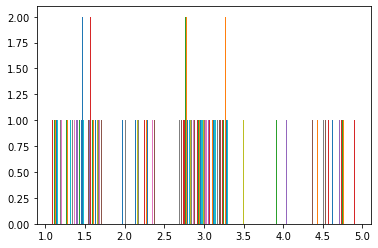

In [14]:
plt.hist(df2[["INCIDENT_CAUSE","CLAIM_STATUS"]],bins=5)

In [15]:
data["FLAG_FOR_FRAUD_INV"].value_counts()

0    569
1    406
Name: FLAG_FOR_FRAUD_INV, dtype: int64

In [16]:
data["CLAIMS_AT_LOSS_DATE"].value_counts()

1    703
2     99
3     83
4     53
5     25
6      9
7      2
8      1
Name: CLAIMS_AT_LOSS_DATE, dtype: int64

In [17]:
data["POLICE_REPORT"].value_counts()

0    556
1    419
Name: POLICE_REPORT, dtype: int64

In [18]:
data["COMMUTE_DISCOUNT"].value_counts()

0    916
1     59
Name: COMMUTE_DISCOUNT, dtype: int64

In [19]:
df2.describe()

,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,MODEL_YEAR,INITIAL_ODOMETER,LOW_MILEAGE_USE,COMMUTE_DISCOUNT
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,2.974359,2.196923,178585.283282,0.429744,1.603077,12476.822564,0.416410,2008.503590,170987.852308,0.092308,0.060513
std,1.503029,0.995983,99500.258502,0.495293,1.155022,13697.986713,0.493216,4.701537,99443.427598,0.289608,0.238557
min,1.000000,1.000000,21015.800000,0.000000,1.000000,1000.000000,0.000000,1991.000000,18348.000000,0.000000,0.000000
25%,2.000000,1.000000,99356.900000,0.000000,1.000000,1900.000000,0.000000,2006.000000,92310.000000,0.000000,0.000000
50%,3.000000,3.000000,163689.500000,0.000000,1.000000,2780.000000,0.000000,2009.000000,155652.000000,0.000000,0.000000
75%,5.000000,3.000000,238025.200000,1.000000,2.000000,24300.000000,1.000000,2012.000000,230514.000000,0.000000,0.000000
max,5.000000,4.000000,593427.400000,1.000000,8.000000,48035.500000,1.000000,2016.000000,585828.000000,1.000000,1.000000


In [20]:
b1=df2[df2["INCIDENT_CAUSE"]==5]

print(len(b1),len(b2))

NameError: name 'b2' is not defined

In [ ]:
plt.hist(df2[df2["INCIDENT_CAUSE"]==5].CLAIM_STATUS)

In [ ]:
df2["INCIDENT_CAUSE"].value_counts()

In [ ]:
df2["CLAIM_STATUS"].value_counts()

In [ ]:
df2.describe()

In [ ]:
df2.dtypes

In [ ]:
c1=df2[df2["CLAIM_STATUS"]==1].CLAIM_AMOUNT
c2=df2[df2["CLAIM_STATUS"]==2].CLAIM_AMOUNT
c3=df2[df2["CLAIM_STATUS"]==3].CLAIM_AMOUNT
c4=df2[df2["CLAIM_STATUS"]==4].CLAIM_AMOUNT

In [ ]:
plt.figure(figsize=(7,7))
plt.hist([c1,c2,c3,c4],color=["red","green","blue","orange"],label=["claim_status_1","claim_status_2","claim_status_3","claim_status_4"],rwidth=2.0)
plt.ylabel("No of person")
plt.xlabel("Claim amount")
plt.legend()

In [ ]:
df2["CLAIM_STATUS"].value_counts()

Maximum Claim was done b/w 1 and 1,000 and the claim status is 3

In [ ]:
df2.sample(10)

In [ ]:
d1=df2[df2["POLICE_REPORT"]==0].CLAIM_AMOUNT
d2=df2[df2["POLICE_REPORT"]==1].CLAIM_AMOUNT

In [21]:
plt.hist([d1,d2],color=["orange","yellow"],label=["Police_Report_0","Police_report_1"])
plt.xlabel("Claim Amount")
plt.ylabel("No of Person")
plt.legend()

NameError: name 'd1' is not defined

In [22]:
df2["POLICE_REPORT"].value_counts()

0    556
1    419
Name: POLICE_REPORT, dtype: int64

In [23]:
c1=df2[df2["CLAIM_STATUS"]==1].INITIAL_ODOMETER
c2=df2[df2["CLAIM_STATUS"]==2].INITIAL_ODOMETER
c3=df2[df2["CLAIM_STATUS"]==3].INITIAL_ODOMETER
c4=df2[df2["CLAIM_STATUS"]==4].INITIAL_ODOMETER

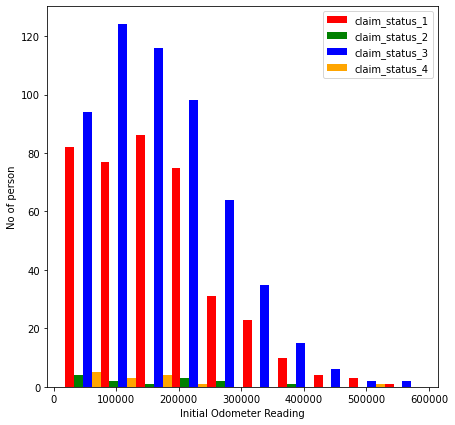

In [24]:
plt.figure(figsize=(7,7))
plt.hist([c1,c2,c3,c4],color=["red","green","blue","orange"],label=["claim_status_1","claim_status_2","claim_status_3","claim_status_4"],rwidth=2.0)
plt.ylabel("No of person")
plt.xlabel("Initial Odometer Reading")
plt.legend()

In [25]:
df3=df2.copy()
L=LabelEncoder()
df3["GENDER"]=L.fit_transform(df2["GENDER"])

In [26]:
d1=df3[df3["GENDER"]==0].CLAIM_STATUS
d2=df3[df3["GENDER"]==1].CLAIM_STATUS

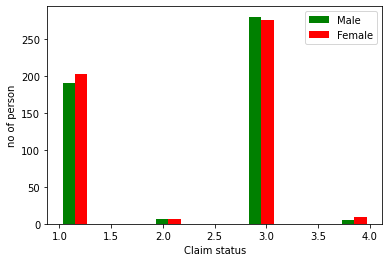

In [27]:
plt.hist([d1,d2],color=["green","red"],label=["Male","Female"])
plt.xlabel("Claim status")
plt.ylabel("no of person")
plt.legend()

In [28]:
df2["MAKE"].unique()

array(['Nissan', 'Dodge', 'Chevrolet', 'Honda', 'Ford', 'Kia', 'Hyundai',
       'Toyota', 'Jeep', 'Mazda', 'Acura', 'Subaru', 'Buick', 'GMC',
       'Chrysler', 'Audi', 'Mercedes', 'Cadillac', 'Lexus', 'Volkswagen',
       'BMW'], dtype=object)

<BarContainer object of 975 artists>

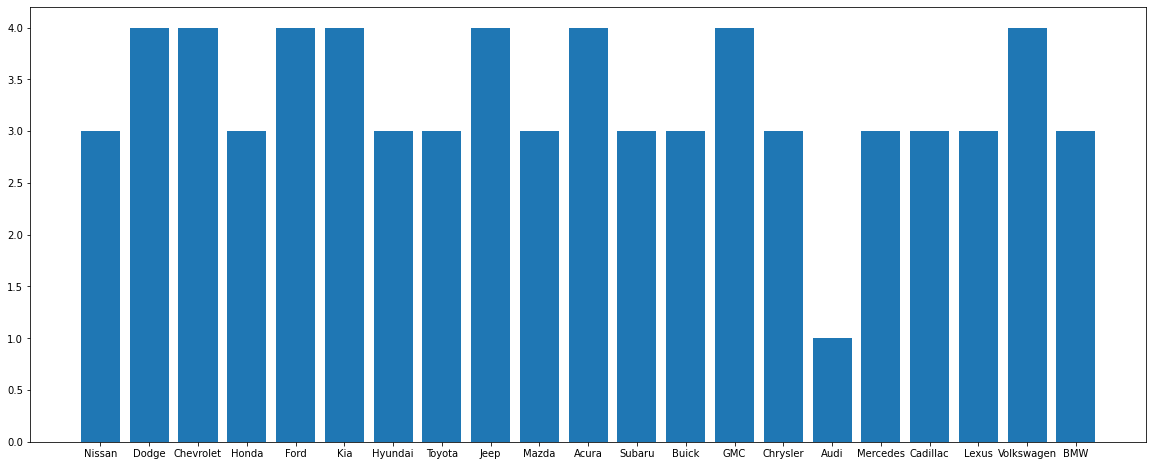

In [29]:
plt.figure(figsize=(20,8))
plt.bar(df2["MAKE"],df2["CLAIM_STATUS"])

In [30]:
df2["MAKE"].value_counts()

Chevrolet     138
Ford          135
Toyota        107
Nissan         82
Honda          76
Dodge          68
Hyundai        60
Jeep           53
Subaru         41
Kia            36
GMC            34
Volkswagen     25
Mazda          19
Acura          19
Chrysler       18
Mercedes       18
Buick          15
Lexus          13
BMW             9
Audi            5
Cadillac        4
Name: MAKE, dtype: int64

Make number of cars were sold by Chevrolet

In [31]:
df2.sample(10)

,POLICY_ID,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,CLAIM_INIT_TIME,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,START_DATE,EXPIRY_DATE,MODEL_YEAR,MAKE,MODEL,INITIAL_ODOMETER,LOW_MILEAGE_USE,GENDER,COMMUTE_DISCOUNT
420,PW7629715,5,3,159402.5,4/27/17,0,2,2850.0,0,7/22/16,7/22/17,2010,Dodge,Grand Caravan,150972,0,M,0
335,WW3786529,2,3,174632.9,10/18/16,0,1,2490.0,0,7/16/15,7/15/16,2009,Mazda,CX-5,167748,0,M,1
152,YT6572935,3,3,191073.0,07-06-2017,0,1,1640.0,0,7/16/16,7/16/17,2009,Ford,Explorer,177528,0,M,0
959,PZ8927119,2,3,112831.5,8/30/18,0,1,1350.0,0,03-10-2017,03-10-2018,2006,Nissan,Titan,109554,1,F,1
826,XY1991214,3,1,234847.1,4/19/18,0,1,20350.0,1,06-05-2017,06-05-2018,2007,Hyundai,Elantra,222948,0,M,0
135,UO1603964,5,1,141307.8,5/16/16,1,1,25160.0,1,10-04-2015,10-03-2016,2010,Jeep,Wrangler,137664,0,F,0
476,VY1810959,5,1,91465.0,1/24/18,1,1,20610.0,1,03-07-2017,03-07-2018,2014,Hyundai,Elantra,88908,0,F,0
49,OP0488234,1,3,86881.4,12-02-2017,0,1,2550.0,0,04-03-2016,04-03-2017,2013,Nissan,Altima,79524,0,M,0
32,YS2739165,3,3,223253.6,11/30/18,0,1,1890.0,0,02-08-2017,02-08-2018,2009,Toyota,Corolla,212976,0,F,0
680,VO3834413,1,3,96568.9,5/14/17,0,1,2150.0,0,11-05-2016,11-05-2017,2013,Hyundai,Elantra,82752,0,M,0


(array([[229.,   0., 172.,   0.,   0., 223.,   0.,  97.,   0., 254.],
        [392.,   0.,  13.,   0.,   0., 556.,   0.,  14.,   0.,   0.]]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 2 Lists of Patches objects>)

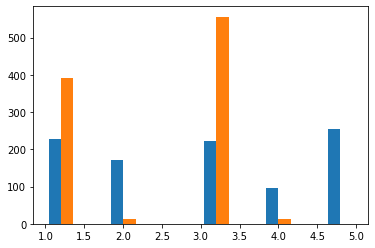

In [32]:
plt.hist([df2["INCIDENT_CAUSE"],df2["CLAIM_STATUS"]])

(array([178., 126., 136.,  83., 101.,  98.,  86.,  62.,  64.,  41.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

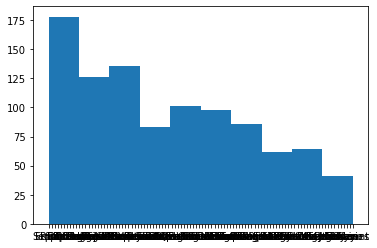

In [33]:
plt.hist(df2["MODEL"])

In [34]:
df2.MODEL.value_counts()

F-150        42
Ram          31
Rogue        29
Silverado    27
Explorer     25
             ..
3 series      2
C Class       2
Passat        2
Fit           1
Accent        1
Name: MODEL, Length: 100, dtype: int64

Maximum Model sold was of f-150 and minimum accent and fit

In [35]:
df2["LOW_MILEAGE_USE"].value_counts()

0    885
1     90
Name: LOW_MILEAGE_USE, dtype: int64

In [36]:
e1=df2[df2["LOW_MILEAGE_USE"]==0].CLAIM_STATUS
e2=df2[df2["LOW_MILEAGE_USE"]==1].CLAIM_STATUS

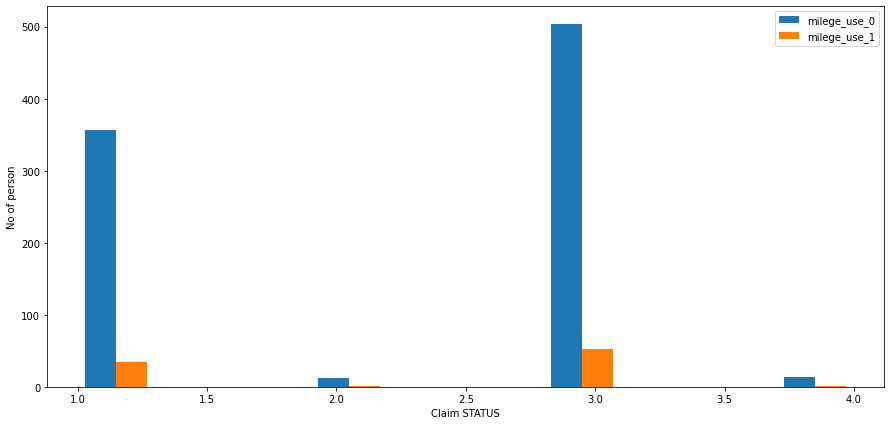

In [37]:
plt.figure(figsize=(15,7))
plt.hist([e1,e2],label=["milege_use_0","milege_use_1"])
plt.xlabel("Claim STATUS")
plt.ylabel("No of person")
plt.legend()

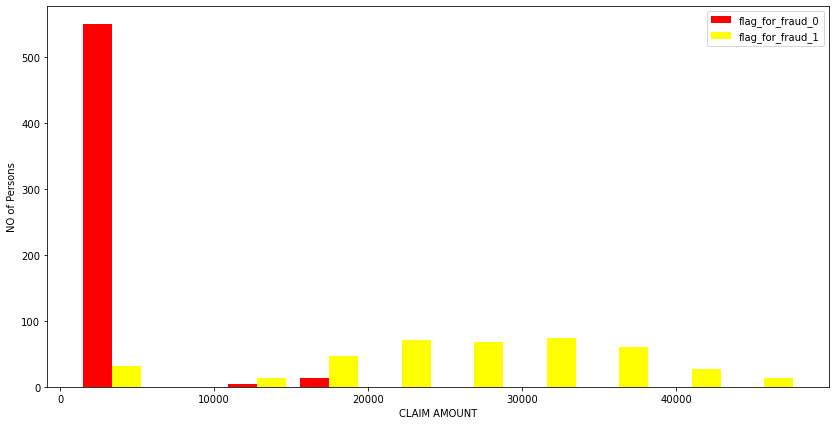

In [38]:
a1=df2[df2["FLAG_FOR_FRAUD_INV"]==0].CLAIM_AMOUNT
a2=df2[df2["FLAG_FOR_FRAUD_INV"]==1].CLAIM_AMOUNT
plt.figure(figsize=(14,7))
plt.hist([a1,a2],color=["red","yellow"],label=["flag_for_fraud_0","flag_for_fraud_1"])
plt.xlabel("CLAIM AMOUNT")
plt.ylabel("NO of Persons")
plt.legend()

In [39]:
print("MEAN  = ",np.mean(df2[df2["FLAG_FOR_FRAUD_INV"]==1].CLAIM_AMOUNT))

MEAN  =  26429.480295566504


In [40]:
np.mean(df2[df2["FLAG_FOR_FRAUD_INV"]==0].CLAIM_AMOUNT)

2521.14762741652

In [41]:
df2["FLAG_FOR_FRAUD_INV"].value_counts()

0    569
1    406
Name: FLAG_FOR_FRAUD_INV, dtype: int64

<BarContainer object of 975 artists>

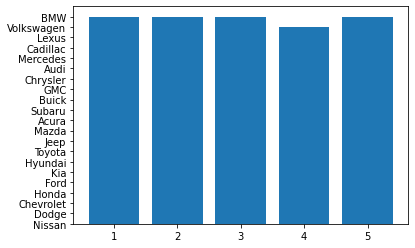

In [42]:
plt.bar(df2["INCIDENT_CAUSE"],df2["MAKE"])

In [43]:
df2["MAKE"].unique()

array(['Nissan', 'Dodge', 'Chevrolet', 'Honda', 'Ford', 'Kia', 'Hyundai',
       'Toyota', 'Jeep', 'Mazda', 'Acura', 'Subaru', 'Buick', 'GMC',
       'Chrysler', 'Audi', 'Mercedes', 'Cadillac', 'Lexus', 'Volkswagen',
       'BMW'], dtype=object)

In [44]:
df2["number_make"]=LabelEncoder().fit_transform(df2["MAKE"])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  5.,  7.,  7.,  1., 62.,  9., 21., 49., 13., 27., 28., 25.,
         15.,  3.,  4.,  7., 31., 12., 63.],
        [ 0.,  0.,  0.,  0.,  0.,  4.,  0.,  1.,  1.,  1.,  2.,  1.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  2.],
        [15.,  0.,  2.,  8.,  3., 68.,  9., 44., 83., 19., 47., 31., 27.,
         19., 10., 15., 11., 50., 29., 66.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 4 Lists of Patches objects>)

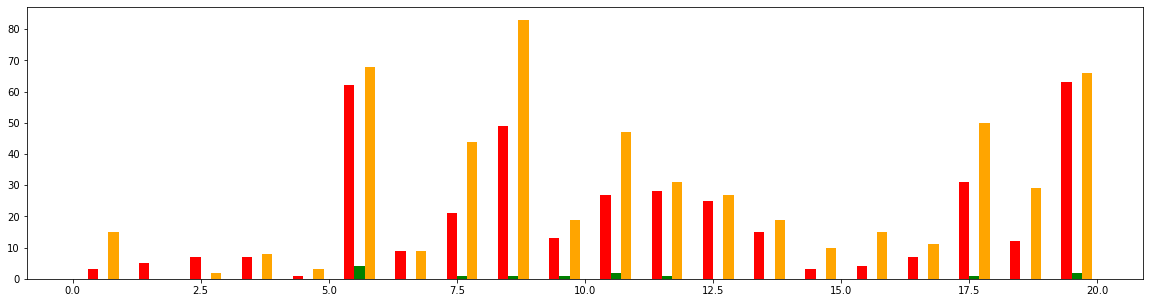

In [45]:
plt.figure(figsize=(20,5))
c1=df2[df2["CLAIM_STATUS"]==0].number_make
c2=df2[df2["CLAIM_STATUS"]==1].number_make
c3=df2[df2["CLAIM_STATUS"]==2].number_make
c4=df2[df2["CLAIM_STATUS"]==3].number_make
plt.hist([c1,c2,c3,c4],bins=(20),color=["yellow","red","green","orange"])

In [46]:
df2["MAKE"].value_counts()

Chevrolet     138
Ford          135
Toyota        107
Nissan         82
Honda          76
Dodge          68
Hyundai        60
Jeep           53
Subaru         41
Kia            36
GMC            34
Volkswagen     25
Mazda          19
Acura          19
Chrysler       18
Mercedes       18
Buick          15
Lexus          13
BMW             9
Audi            5
Cadillac        4
Name: MAKE, dtype: int64

In [47]:
df2["CLAIM_STATUS"].unique()

array([1, 3, 2, 4], dtype=int64)

In [48]:
df2.sample(10)

,POLICY_ID,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,CLAIM_INIT_TIME,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,START_DATE,EXPIRY_DATE,MODEL_YEAR,MAKE,MODEL,INITIAL_ODOMETER,LOW_MILEAGE_USE,GENDER,COMMUTE_DISCOUNT,number_make
89,TZ4837583,4,3,69086.7,9/13/17,1,1,2460.0,0,2/19/16,2/18/17,2014,Mercedes,E class,59616,0,M,1,16
658,YT7950892,3,1,60390.6,05-02-2016,0,1,33522.5,1,6/28/15,6/27/16,2013,Chevrolet,Impala,54288,0,F,0,5
364,YR9378042,2,1,307119.0,11-06-2018,1,1,25580.0,1,9/13/17,9/13/18,2004,Nissan,Rogue,299040,0,F,0,17
739,NR1827781,1,1,100706.7,01-02-2017,0,4,22000.0,1,3/23/16,3/23/17,2013,Dodge,Challenger,91056,0,F,0,7
682,OV7082856,4,2,246760.8,01-03-2019,0,1,2334.5,0,9/19/17,9/19/18,2007,Hyundai,Santa Fe,234576,0,M,0,11
358,OV1933886,1,1,231403.5,1/31/17,1,1,27910.0,1,08-06-2016,08-06-2017,2007,Dodge,Ram,226200,0,F,0,7
945,VR3029092,4,3,588158.9,08-09-2018,0,1,1160.0,0,06-08-2017,06-08-2018,1991,Chrysler,Pacifica,577044,0,M,0,6
107,XS3724662,5,1,77746.1,06-06-2018,1,1,26320.0,1,11-10-2017,11-10-2018,2012,Subaru,Outback,65664,1,M,0,18
371,XZ8486437,3,3,223745.0,7/25/17,1,1,3151.0,0,10-05-2016,10-05-2017,2007,Nissan,Rogue,213948,0,F,0,17
710,ZW8182964,5,1,68988.4,7/16/16,1,1,18670.0,1,08-04-2015,08-03-2016,2013,Chevrolet,Malibu,58464,0,F,0,5


Text(0, 0.5, 'NO of CARS')

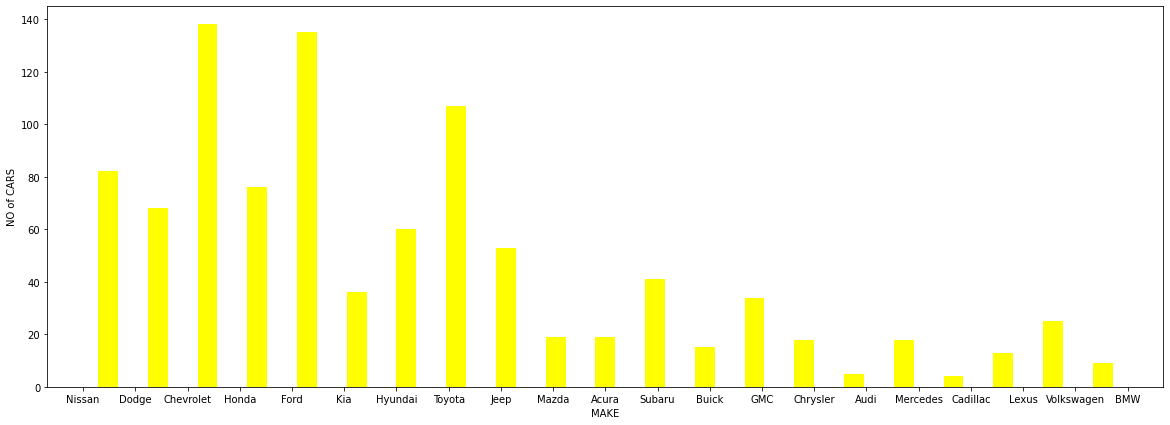

In [49]:
plt.figure(figsize=(20,7))
plt.hist(df2["MAKE"],color="yellow",bins=21,rwidth=0.4)
plt.xlabel("MAKE")
plt.ylabel("NO of CARS")

<BarContainer object of 975 artists>

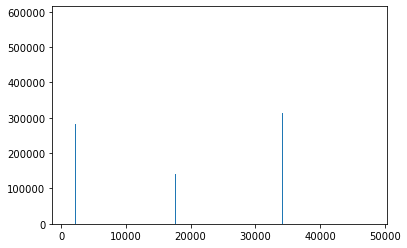

In [50]:
plt.bar(df2["CLAIM_AMOUNT"],df2["INITIAL_ODOMETER"],width=1)

In [51]:
len(df2["MODEL"].unique())

100

In [52]:
df2["MODEL"].value_counts()

F-150        42
Ram          31
Rogue        29
Silverado    27
Explorer     25
             ..
3 series      2
C Class       2
Passat        2
Fit           1
Accent        1
Name: MODEL, Length: 100, dtype: int64

(array([[409.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.],
        [160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 259.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

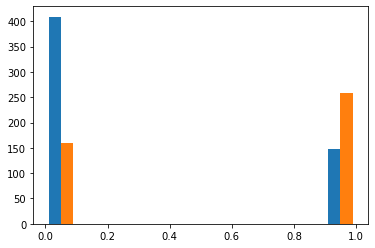

In [53]:
b1=df2[df2["POLICE_REPORT"]==0].FLAG_FOR_FRAUD_INV
b2=df2[df2["POLICE_REPORT"]==1].FLAG_FOR_FRAUD_INV
plt.hist([b1,b2])

<BarContainer object of 975 artists>

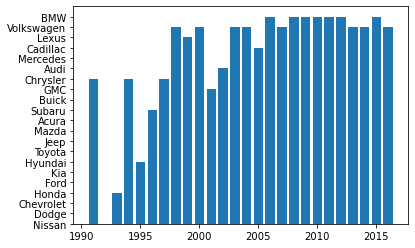

In [54]:
plt.bar(df2["MODEL_YEAR"],df2["MAKE"])

In [55]:
df2.MODEL_YEAR.value_counts()

2010    89
2011    86
2007    81
2009    80
2013    75
2014    69
2008    67
2012    60
2004    56
2006    55
2015    53
2005    44
2003    34
2016    24
2002    21
2000    19
2001    17
1998    15
1999    11
1996     5
1997     4
1993     3
1991     3
1995     2
1994     2
Name: MODEL_YEAR, dtype: int64

In [56]:
df2[["CLAIM_INIT_TIME","START_DATE","EXPIRY_DATE"]]

,CLAIM_INIT_TIME,START_DATE,EXPIRY_DATE
0,4/28/17,9/19/16,9/19/17
1,8/31/18,6/14/17,6/14/18
2,01-11-2016,8/24/15,8/23/16
3,12/18/16,7/25/15,7/24/16
4,06-08-2017,01-08-2016,01-07-2017
...,...,...,...
970,12-01-2016,07-12-2015,07-11-2016
971,8/21/16,7/21/15,7/20/16
972,09-03-2016,8/21/15,8/20/16
973,02-04-2017,4/21/16,4/21/17


In [57]:
data

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,4/25/17,4/28/17,...,M,12/25/73,457-20-9007,X151-5971-1594,8/19/18,IL,4/16/99,634-603-0960,wdorau@freshmaail.com,0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,8/26/18,8/31/18,...,F,9/14/45,718-38-8987,K702-7678-1851,1/27/18,IL,06-09-2011,827-916-0381,tmostrom@yahoot.com,0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,01-07-2016,01-11-2016,...,F,5/16/88,076-62-7083,V549-5272-3181,11/19/19,IL,5/21/05,723-552-0479,esebranek@zohoo.com,0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,12-11-2016,12/18/16,...,M,1/18/74,571-32-3662,Z350-2956-6553,5/16/19,IL,03-11-2000,741-637-0631,dnickless@life.com,0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,06-06-2017,06-08-2017,...,M,05-01-1950,315-84-4443,E912-8544-3880,07-06-2020,IL,07-04-2012,735-427-0152,fliggan@mooosend.com,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,CM11612,GJI9724,QY3512250,A-2016-TJ210,3,NaN,1,77438.7,11/29/16,12-01-2016,...,F,11-10-1979,037-94-2844,E550-8174-2772,6/23/18,IL,6/21/15,841-453-0442,mino@gmxx.com,0
971,HM55275,ORD4650,XR9202123,A-2016-EU678,1,NaN,3,219285.9,8/14/16,8/21/16,...,M,02-01-1969,557-54-2527,Z266-2079-9402,8/16/19,IL,05-11-2014,359-431-0768,glavorato@yahoot.com,0
972,BA79937,BLV8655,TU0769843,A-2016-MT971,1,NaN,1,192320.1,8/22/16,09-03-2016,...,M,9/21/55,006-98-8737,J721-8375-9029,12/24/19,IL,1/14/14,738-442-0942,dsprosty@yahoot.com,1
973,AL29368,XBH9030,UU9571126,A-2017-ZX388,2,NaN,3,273023.9,1/24/17,02-04-2017,...,M,10/25/69,868-35-5110,M268-6803-2588,9/17/20,IL,02-11-2010,362-923-0983,tbatinich@outloop.com,0


In [58]:
data.columns

Index(['HOUSEHOLD_ID', 'DRIVER_ID', 'POLICY_ID', 'CLAIM_ID', 'INCIDENT_CAUSE',
       'DESCRIPTION', 'CLAIM_STATUS', 'ODOMETER_AT_LOSS', 'LOSS_EVENT_TIME',
       'CLAIM_INIT_TIME', 'POLICE_REPORT', 'CLAIMS_AT_LOSS_DATE',
       'LOSS_LOCATION_LAT', 'LOSS_LOCATION_LONG', 'CLAIM_AMOUNT',
       'FLAG_FOR_FRAUD_INV', 'PRIMARY_DRIVER_ID', 'START_DATE', 'EXPIRY_DATE',
       'MODEL_YEAR', 'MAKE', 'MODEL', 'PLATE', 'COLOR', 'INITIAL_ODOMETER',
       'LOW_MILEAGE_USE', 'FIRST_NAME', 'LAST_NAME', 'GENDER', 'BIRTHDATE',
       'SSN', 'DRIVERS_LICENSE_ID', 'DRIVERS_LICENSE_EXPIRY',
       'DRIVERS_LICENSE_STATE', 'DATE_AT_CURRENT_ADDRESS', 'CONTACT_NUMBER',
       'EMAIL', 'COMMUTE_DISCOUNT'],
      dtype='object')

In [59]:
data.isnull().sum()

HOUSEHOLD_ID                 0
DRIVER_ID                    0
POLICY_ID                    0
CLAIM_ID                     0
INCIDENT_CAUSE               0
DESCRIPTION                975
CLAIM_STATUS                 0
ODOMETER_AT_LOSS             0
LOSS_EVENT_TIME              0
CLAIM_INIT_TIME              0
POLICE_REPORT                0
CLAIMS_AT_LOSS_DATE          0
LOSS_LOCATION_LAT            0
LOSS_LOCATION_LONG           0
CLAIM_AMOUNT                 0
FLAG_FOR_FRAUD_INV           0
PRIMARY_DRIVER_ID            0
START_DATE                   0
EXPIRY_DATE                  0
MODEL_YEAR                   0
MAKE                         0
MODEL                        0
PLATE                        0
COLOR                        0
INITIAL_ODOMETER             0
LOW_MILEAGE_USE              0
FIRST_NAME                   0
LAST_NAME                    0
GENDER                       0
BIRTHDATE                    0
SSN                          0
DRIVERS_LICENSE_ID           0
DRIVERS_

In [60]:
data.sample(10)

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
160,CD07410,OUL2233,NN8771027,A-2017-AJ838,4,NaN,3,164574.7,6/29/17,07-08-2017,...,M,4/30/88,563-45-1203,R720-5219-2390,11/17/18,IL,11/15/10,243-561-0348,lbrowell@life.com,0
148,DL13046,DVO4563,QX0354637,A-2016-XK569,5,NaN,3,134162.4,5/29/16,06-01-2016,...,F,1/21/61,061-04-0496,T964-1748-9808,11-06-2020,IL,6/27/08,824-704-0905,ksavoca@gmxx.com,0
832,FM11570,TLH8366,XR5174546,A-2018-MR737,5,NaN,4,161025.1,12/26/18,12/29/18,...,M,10/24/70,745-36-3324,J285-2778-7275,2/16/20,IL,01-01-2013,258-465-0422,kgersdorf@mailjeep.com,0
508,GF70444,IIN4093,UV6319755,A-2018-DJ532,5,NaN,1,65337.8,1/30/18,02-04-2018,...,M,6/30/81,451-98-7041,F775-3069-7550,6/14/21,IL,9/24/05,247-854-0112,tcawyer@mailjeep.com,0
176,GB93184,DZC9388,QU3821009,A-2018-EQ268,1,NaN,1,164476.1,3/20/18,3/30/18,...,M,12/18/91,206-76-7143,Q891-4703-6823,2/22/21,IL,10-01-2004,230-558-0654,epozzuoli@mailjeep.com,0
599,KI57625,LAJ1404,YZ3695561,A-2017-SA921,1,NaN,1,48924.8,5/16/17,5/30/17,...,F,6/15/55,055-19-5939,D129-1070-9437,04-11-2018,IL,7/17/13,736-482-0170,vbreuer@mmail.com,0
298,MA22782,RBD4666,ZR8241641,A-2016-HP797,5,NaN,3,77380.8,3/25/16,04-06-2016,...,M,11-04-1941,523-74-5900,T984-1807-5712,10/24/21,IL,11-07-2013,247-262-0245,vwillkomm@mailjeep.com,0
626,LK43924,KXX3271,YV5069582,A-2017-SK594,3,NaN,3,208666.4,05-03-2017,05-12-2017,...,F,12/23/50,037-05-7843,G536-8260-4100,7/27/21,IL,2/21/05,237-985-0699,jscilingo@outloop.com,0
297,HJ97956,MLI4847,ZR3742044,A-2017-CO477,3,NaN,1,92951.4,11-12-2017,11/20/17,...,F,10-05-2000,510-69-2087,J428-5829-6620,09-11-2019,IL,09-03-2002,826-554-0870,bterres@lightemail.com,0
843,AB26747,JQY5798,PW0558679,A-2017-ZM273,2,NaN,3,58508.1,1/23/17,1/31/17,...,M,1/27/38,530-78-4476,O309-3695-2552,6/22/19,IL,11-06-2005,750-420-0968,njarstad@inboux.com,0


In [61]:
len(data.EMAIL.unique())

975

In [62]:
df2["COMMUTE_DISCOUNT"].value_counts()

0    916
1     59
Name: COMMUTE_DISCOUNT, dtype: int64

In [63]:
df2.sample(10)

,POLICY_ID,INCIDENT_CAUSE,CLAIM_STATUS,ODOMETER_AT_LOSS,CLAIM_INIT_TIME,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,START_DATE,EXPIRY_DATE,MODEL_YEAR,MAKE,MODEL,INITIAL_ODOMETER,LOW_MILEAGE_USE,GENDER,COMMUTE_DISCOUNT,number_make
840,ZT9862770,1,3,154829.1,07-11-2018,0,1,1276.5,0,3/19/17,3/19/18,2010,Chevrolet,Impala,152856,0,F,0,5
456,SS8528719,2,3,153912.4,8/22/17,0,1,3128.0,0,01-06-2016,01-05-2017,2009,Hyundai,Elantra,150744,0,F,0,11
289,YZ7566990,4,3,131096.9,05-08-2016,0,3,2430.0,0,3/26/15,3/25/16,2010,Jeep,Wrangler,116208,0,M,0,12
910,QY6186043,5,3,22236.2,05-04-2018,1,1,1630.0,0,02-07-2017,02-07-2018,2016,GMC,Sierra,19320,1,M,0,9
954,SP1179929,4,1,227731.0,7/20/17,1,1,37200.0,1,8/20/16,8/20/17,2007,GMC,Terrain,226572,0,M,0,9
681,WP2475976,1,1,88222.5,12/24/16,0,1,30340.0,1,01-06-2015,01-06-2016,2012,Ford,Explorer,73968,0,M,0,8
943,ZY8848637,5,3,318041.5,4/21/17,0,1,1150.0,0,4/22/16,4/22/17,2000,Honda,Odyssey,306816,0,M,1,10
604,UP3563314,5,1,140775.2,2/28/16,1,5,34971.5,1,9/28/15,9/27/16,2009,Mercedes,GLC,136164,0,F,0,16
538,TQ8626006,2,3,52294.1,3/24/16,0,1,2590.0,0,9/20/15,9/19/16,2014,Ford,F-150,47592,0,F,0,8
552,XW7156399,1,3,22756.4,12-11-2017,0,1,2970.0,0,09-02-2016,09-02-2017,2016,Ford,F-150,18348,0,M,0,8


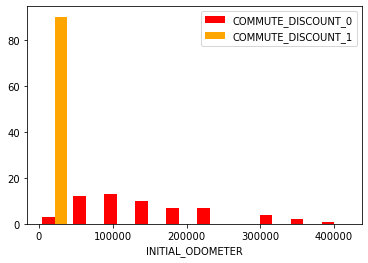

In [64]:
e1=df2[df2["COMMUTE_DISCOUNT"]==0].INITIAL_ODOMETER
e1=df2[df2["COMMUTE_DISCOUNT"]==1].INITIAL_ODOMETER
plt.xlabel("INITIAL_ODOMETER")
plt.hist([e1,e2],color=["red","orange"],label=["COMMUTE_DISCOUNT_0","COMMUTE_DISCOUNT_1"])
plt.legend()



In [65]:
len(df2["INITIAL_ODOMETER"].unique())

949

In [66]:
df2["COMMUTE_DISCOUNT"].value_counts()

0    916
1     59
Name: COMMUTE_DISCOUNT, dtype: int64

In [67]:
df2["CLAIMS_AT_LOSS_DATE"].unique()

array([1, 2, 5, 3, 4, 6, 8, 7], dtype=int64)

(array([ 3.,  0.,  3.,  2.,  2.,  5.,  4., 15., 11., 19., 17., 21., 34.,
        56., 44., 55., 81., 67., 80., 89., 86., 60., 75., 69., 77.]),
 array([1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
        2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
        2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.]),
 <a list of 25 Patch objects>)

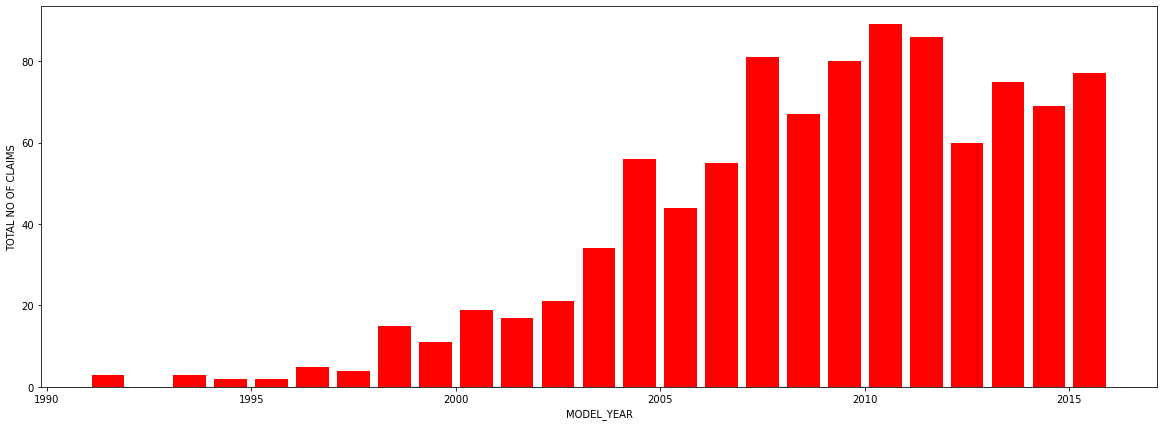

In [68]:
plt.figure(figsize=(20,7))
plt.xlabel("MODEL_YEAR")
plt.ylabel("TOTAL NO OF CLAIMS")
plt.hist(df2["MODEL_YEAR"],bins=25,rwidth=0.8,color="red")

In [69]:
df2["MODEL_YEAR"].value_counts()

2010    89
2011    86
2007    81
2009    80
2013    75
2014    69
2008    67
2012    60
2004    56
2006    55
2015    53
2005    44
2003    34
2016    24
2002    21
2000    19
2001    17
1998    15
1999    11
1996     5
1997     4
1993     3
1991     3
1995     2
1994     2
Name: MODEL_YEAR, dtype: int64

In [70]:
df2[df2["MODEL_YEAR"]==2010].MAKE.value_counts()

Chevrolet     14
Honda         12
Ford          12
Dodge         10
Subaru         5
Hyundai        5
Toyota         5
Chrysler       4
Nissan         3
Jeep           3
Kia            3
Lexus          2
BMW            2
Acura          2
Buick          2
Volkswagen     2
Mercedes       1
Mazda          1
GMC            1
Name: MAKE, dtype: int64